In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("datasets/hotel_bookings.csv")
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


# No. 1
Get the big picture of what the data is about.

In [3]:
data.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [4]:
data['is_canceled'] = data['is_canceled'].replace({0: False, 1: True})
data['is_repeated_guest'] = data['is_repeated_guest'].replace({0: False, 1: True})
data["reservation_status_date"] = pd.to_datetime(data["reservation_status_date"], format="%Y-%m-%d", errors="coerce")

In [5]:
data.dtypes

hotel                                     object
is_canceled                                 bool
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country                                   object
market_segment                            object
distribution_channel                      object
is_repeated_guest                           bool
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

# No. 2
Inspect the properties of the data in each column (type, missing value, etc).

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  bool          
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [7]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

# No. 3
Show the amount of data, mean, median, and std.

In [8]:
data.describe()

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
data.describe(include='all', datetime_is_numeric=True)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,2,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,NaN
top,City Hotel,False,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,NaN
freq,79330,75166,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,NaN
mean,NaN,NaN,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,2016-07-30 00:24:47.883354368
min,NaN,NaN,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,2014-10-17 00:00:00
25%,NaN,NaN,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,2016-02-01 00:00:00
50%,NaN,NaN,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,2016-08-07 00:00:00
75%,NaN,NaN,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,2017-02-08 00:00:00
max,NaN,NaN,737.000000,2017.000000,NaN,53.000000,31.000000,19.000000,50.000000,55.000000,...,NaN,535.000000,543.000000,391.000000,NaN,5400.000000,8.000000,5.000000,NaN,2017-09-14 00:00:00


# No. 4
How much is the min and max for column with numerical value?

In [10]:
data.select_dtypes(include=['float64', 'int64']).agg(['min', 'max'])

,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
min,0,2015,1,1,0,0,0,0.0,0,0,0,0,1.0,6.0,0,-6.38,0,0
max,737,2017,53,31,19,50,55,10.0,10,26,72,21,535.0,543.0,391,5400.00,8,5


# No. 5
**a.** Drop columns which has missing value more than 50% of the total data.

In [11]:
data5a = data.dropna(axis=0, thresh=(len(data.columns)/2))
data5a

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,False,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,False,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,False,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,False,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,False,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,False,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,False,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,False,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


**b.** Fill the missing value in **agent** with the mean.

In [12]:
data.loc[:, 'agent'] = data.loc[:, 'agent'].fillna(data.loc[:, 'agent'].mean())

**c.** Fill the missing value in **country, children** with the most common name.

In [13]:
data.loc[:, 'country'] = data.loc[:, 'country'].fillna(data.loc[:, 'country'].mode()[0])
data.loc[:, 'children'] = data.loc[:, 'children'].fillna(data.loc[:, 'children'].mode()[0])

In [14]:
data.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               0
babies                                 0
meal                                   0
country                                0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

# No. 6
Make category based on the **lead time**: Short, Medium, and Long.

In [15]:
max_value = data["lead_time"].agg(["max"])
min_value = data["lead_time"].agg(["min"])
range = max_value[0] - min_value[0]
q1 = range/3 + min_value[0]
q1

245.66666666666666

In [16]:
data["category_by_lead_time"] = np.where(data["lead_time"] <= q1, "Short", np.where(data["lead_time"] <= q1*2, "Medium", "Long"))

In [17]:
data

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,category_by_lead_time
0,Resort Hotel,False,342,2015,July,27,1,0,0,2,...,86.693382,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Medium
1,Resort Hotel,False,737,2015,July,27,1,0,0,2,...,86.693382,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,Long
2,Resort Hotel,False,7,2015,July,27,1,0,1,1,...,86.693382,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,Short
3,Resort Hotel,False,13,2015,July,27,1,0,1,1,...,304.000000,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,Short
4,Resort Hotel,False,14,2015,July,27,1,0,2,2,...,240.000000,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23,2017,August,35,30,2,5,2,...,394.000000,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,Short
119386,City Hotel,False,102,2017,August,35,31,2,5,3,...,9.000000,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,Short
119387,City Hotel,False,34,2017,August,35,31,2,5,2,...,9.000000,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,Short
119388,City Hotel,False,109,2017,August,35,31,2,5,2,...,89.000000,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,Short


# No. 7
Filter all data which has **reservation_status_date** in >2017.

In [18]:
data[data["reservation_status_date"] >= pd.Timestamp(2017,1,1)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,category_by_lead_time
9788,Resort Hotel,True,89,2017,January,1,2,1,3,2,...,240.000000,NaN,0,Transient,46.80,0,1,No-Show,2017-01-02,Short
9805,Resort Hotel,True,6,2017,January,1,4,0,1,1,...,86.693382,NaN,0,Transient,39.00,0,0,Canceled,2017-01-03,Short
9809,Resort Hotel,True,112,2017,January,1,4,2,4,2,...,240.000000,NaN,0,Transient,52.00,0,2,No-Show,2017-01-04,Short
9813,Resort Hotel,True,4,2017,January,1,5,0,3,2,...,240.000000,NaN,0,Transient,48.00,0,0,Canceled,2017-01-01,Short
9818,Resort Hotel,True,2,2017,January,1,6,2,3,1,...,240.000000,NaN,0,Transient,43.00,0,1,No-Show,2017-01-06,Short
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,False,23,2017,August,35,30,2,5,2,...,394.000000,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06,Short
119386,City Hotel,False,102,2017,August,35,31,2,5,3,...,9.000000,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07,Short
119387,City Hotel,False,34,2017,August,35,31,2,5,2,...,9.000000,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07,Short
119388,City Hotel,False,109,2017,August,35,31,2,5,2,...,89.000000,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07,Short


# No. 8
Visualize the __arrival_date_month__ to see in what month the most visitors come.

In [19]:
data8 = data["arrival_date_month"].value_counts()
data8

August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64

In [20]:
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
visitors = [0]*len(months)

In [21]:
for month in months:
    idx = months.index(month)
    visitors[idx] = data8[month]
visitors

[5929, 8068, 9794, 11089, 11791, 10939, 12661, 13877, 10508, 11160, 6794, 6780]

In [22]:
import matplotlib.pyplot as plt

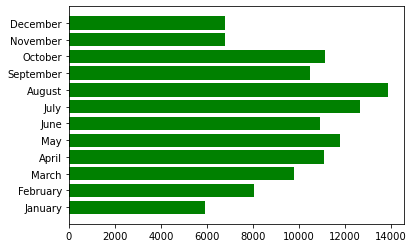

In [23]:
plt.barh(months, visitors, color='g')
plt.show()